In [23]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import mplstereonet
import mplstereonet.stereonet_math
from mplstereonet.stereonet_math import sph2cart, stereonet2xyz

import math

In [2]:
df_faults = pd.read_csv("results/1-Fault_metrics.csv")
df_faults.head()

,Unnamed: 0,strike,dip,depth_min,depth_max,height,length,area,curv,curv_mean,curv_min,curv_max,curv_x,curv_y
0,0,4.320980,0.578199,-3855.983296,-4242.613502,4706.926988,13898.696435,5.570550e+07,-0.000030,-0.000029,-0.000030,-0.000029,-0.000061,0.000002
1,1,2.236016,0.490603,-4854.006668,-5004.536237,4034.125551,3828.123437,8.709254e+06,-0.000013,-0.000013,-0.000014,-0.000013,-0.000021,-0.000006
2,2,1.821551,0.465284,-2652.978340,-3617.215649,6351.965159,20684.441929,1.079439e+08,-0.000007,-0.000007,-0.000007,-0.000007,-0.000004,-0.000010
3,3,3.035495,0.706882,-3416.414888,-3503.291378,2229.510838,1960.209198,2.456831e+06,0.000066,0.000065,0.000064,0.000066,0.000015,0.000117
4,4,2.724955,0.740406,-1363.503760,-1384.716577,1252.292091,2265.914173,1.792160e+06,-0.000033,-0.000033,-0.000033,-0.000033,-0.000045,-0.000021


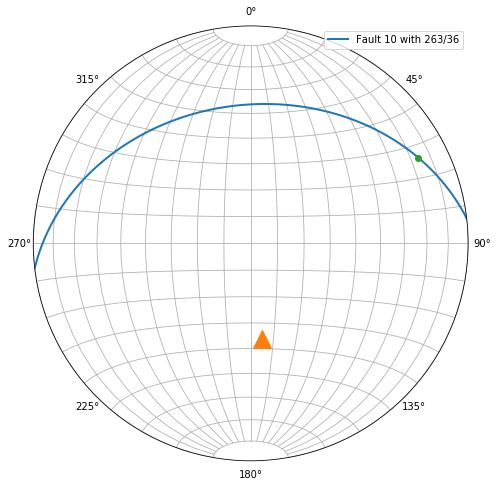

In [22]:
fault_idx = 10
strike, dip = math.degrees(df_faults.loc[fault_idx, 'strike']), math.degrees(df_faults.loc[fault_idx, 'dip'])

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='stereonet')


ax.plane(strike, dip, '-', linewidth=2,label='Fault %d with %03d/%02d' % (fault_idx, strike, dip)) #########change legend to fault num


ax.pole(strike, dip, '^', markersize=18)
ax.rake(strike, dip, -25)


ax.grid()
ax.legend()
plt.show()


In [25]:

fault_idx = 10
strike, dip = math.degrees(df_faults.loc[fault_idx, 'strike']), math.degrees(df_faults.loc[fault_idx, 'dip'])

plunge, bearing = mplstereonet.plane_intersection(strike, dip, strike2, dip2)
#ax.line(plunge, bearing, 'ko', markersize=5, label='Intersection fault 0 and example %02d/%03d' % (plunge, bearing))
real_rake_angle = mplstereonet.project_onto_plane(strike, dip, plunge, bearing)
#rake_angle = np.arcsin(np.sin(plunge)/np.sin(dip))
#pole = mplstereonet.plunge_bearing2pole(plunge, bearing)
#pole2 = mplstereonet.pole(strike, dip)
rake = mplstereonet.rake(strike, dip, real_rake_angle) # return lon, lat
lon, lat = rake
p_cartesian = sph2cart(lon, lat) # return x, y, z
p_world = stereonet2xyz(lon, lat)


print(strike, dip)
print(plunge)
print(bearing)
print(real_rake_angle)
print(rake)
print(p_cartesian, p_world)

263.43887969224835 36.43576588911453
[13.22814853]
[282.00626596]
[22.66145678]
(array([-1.33494562]), array([0.20390934]))
(array([0.22882915]), array([-0.95217188]), array([0.20249922])) (array([-0.95217188]), array([0.20249922]), array([-0.22882915]))


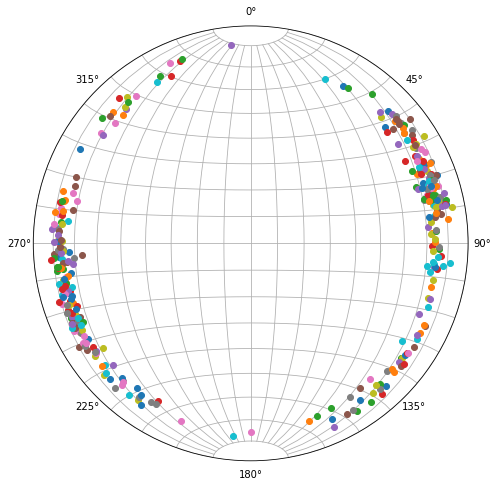

In [20]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='stereonet')

for index, df_fault_row in df_faults.iterrows():
    strike, dip = math.degrees(df_fault_row['strike']), math.degrees(df_fault_row['dip'])

    ax.rake(strike, dip, -25)


ax.grid()
plt.show()
